# Quick vizualisation of the PV procedure
This notebook support the figure 1. Figure 1 gives an overview on the method. It has been realised using solely breast cancer data and the package. Sparse PCA has been used instead of PCA to make the factors sparse and thus easier to understand visually.

In [1]:
# Tissue to consider
tumor_type = 'Breast'
cell_line_type = 'BRCA'
pdx_type = 'BRCA'

# Normalization parameters
normalization = 'TMM'
transformation = 'log'
mean_center = True
std_unit = False
protein_coding_only = True
filter_mytochondrial = False

In [2]:
import os, sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
from sklearn.decomposition import PCA, FastICA, SparsePCA
import scipy
from scipy.stats import ks_2samp
plt.style.use('ggplot')

#Import src implementations
os.environ['OMP_NUM_THREADS'] = '3'
os.environ['KMP_DUPLICATE_LIB_OK']='True'
from data_reader.read_data import read_data
from normalization_methods.feature_engineering import feature_engineering
from precise import PVComputation
from precise import PVComputation, IntermediateFactors, ConsensusRepresentation

## Import data

In [3]:
# Import tumor + cell line data (RNA-seq)
X_target, X_source, gene_names, source_names, target_names = read_data('cell_line',
                                                                       'tumor',
                                                                       'count',
                                                                        None if cell_line_type == 'All' else cell_line_type,
                                                                        tumor_type,
                                                                        filter_mytochondrial)
print('Count data imported')

X_target = feature_engineering(X_target, normalization, transformation, mean_center, std_unit)
X_source = feature_engineering(X_source, normalization, transformation, mean_center, std_unit)

Count data imported


In [4]:
## Filter on top target genes
number_top_genes = 100

top_genes = np.argsort(np.var(X_target, 0))[::-1][:number_top_genes]

X_target_filtered = X_target[:,top_genes]
X_source_filtered = X_source[:, top_genes]

## Compute PCs and PVs

In [5]:
n_factors = 5
n_pv = 5
dim_reduction = 'pca'
dim_reduction_target = 'pca'

In [6]:
# Compute source PCs
source_pc = SparsePCA(n_factors, verbose=10, alpha=1).fit(X_source_filtered).components_
source_pc = scipy.linalg.orth(source_pc.transpose()).transpose()
source_pc_df = pd.DataFrame(source_pc, columns=np.arange(X_source_filtered.shape[1]))
source_pc_df.index = ['Factor %s'%(i+1) for i in range(n_factors)]

# Compute target PCs
target_pc = SparsePCA(n_factors, verbose=10, alpha=10).fit(X_target_filtered).components_
target_pc = scipy.linalg.orth(target_pc.transpose()).transpose()
target_pc_df= pd.DataFrame(target_pc, columns=np.arange(X_target_filtered.shape[1]))
target_pc_df.index = ['Factor %s'%(i+1) for i in range(n_factors)]

/anaconda3/lib/python3.7/site-packages/sklearn/decomposition/sparse_pca.py:170: DeprecationWarning: normalize_components=False is a backward-compatible setting that implements a non-standard definition of sparse PCA. This compatibility mode will be removed in 0.22.
  DeprecationWarning)


Iteration   0 (elapsed time:   0s,  0.0mn, current cost     nan)
Iteration   1 (elapsed time:   0s,  0.0mn, current cost  12132.927)
Iteration   2 (elapsed time:   0s,  0.0mn, current cost  7472.137)
Iteration   3 (elapsed time:   0s,  0.0mn, current cost  7461.421)
Iteration   4 (elapsed time:   0s,  0.0mn, current cost  7453.444)
Iteration   5 (elapsed time:   0s,  0.0mn, current cost  7446.284)
Iteration   6 (elapsed time:   0s,  0.0mn, current cost  7439.600)
Iteration   7 (elapsed time:   0s,  0.0mn, current cost  7432.972)
Iteration   8 (elapsed time:   0s,  0.0mn, current cost  7426.197)
Iteration   9 (elapsed time:   0s,  0.0mn, current cost  7419.219)
Iteration  10 (elapsed time:   0s,  0.0mn, current cost  7411.950)
Iteration  11 (elapsed time:   0s,  0.0mn, current cost  7404.993)
Iteration  12 (elapsed time:   0s,  0.0mn, current cost  7399.133)
Iteration  13 (elapsed time:   0s,  0.0mn, current cost  7394.347)
Iteration  14 (elapsed time:   0s,  0.0mn, current cost  7390.4

Iteration  126 (elapsed time:   5s,  0.1mn, current cost  7342.827)
Iteration  127 (elapsed time:   5s,  0.1mn, current cost  7342.822)
Iteration  128 (elapsed time:   5s,  0.1mn, current cost  7342.817)
Iteration  129 (elapsed time:   5s,  0.1mn, current cost  7342.812)
Iteration  130 (elapsed time:   5s,  0.1mn, current cost  7342.807)
Iteration  131 (elapsed time:   5s,  0.1mn, current cost  7342.803)
Iteration  132 (elapsed time:   5s,  0.1mn, current cost  7342.798)
Iteration  133 (elapsed time:   5s,  0.1mn, current cost  7342.794)
Iteration  134 (elapsed time:   5s,  0.1mn, current cost  7342.790)
Iteration  135 (elapsed time:   5s,  0.1mn, current cost  7342.785)
Iteration  136 (elapsed time:   6s,  0.1mn, current cost  7342.781)
Iteration  137 (elapsed time:   6s,  0.1mn, current cost  7342.777)
Iteration  138 (elapsed time:   6s,  0.1mn, current cost  7342.773)
Iteration  139 (elapsed time:   6s,  0.1mn, current cost  7342.769)
Iteration  140 (elapsed time:   6s,  0.1mn, curr

Iteration  248 (elapsed time:  11s,  0.2mn, current cost  7342.407)
Iteration  249 (elapsed time:  11s,  0.2mn, current cost  7342.403)
Iteration  250 (elapsed time:  11s,  0.2mn, current cost  7342.399)
Iteration  251 (elapsed time:  11s,  0.2mn, current cost  7342.396)
Iteration  252 (elapsed time:  11s,  0.2mn, current cost  7342.392)
Iteration  253 (elapsed time:  11s,  0.2mn, current cost  7342.388)
Iteration  254 (elapsed time:  11s,  0.2mn, current cost  7342.384)
Iteration  255 (elapsed time:  11s,  0.2mn, current cost  7342.381)
Iteration  256 (elapsed time:  11s,  0.2mn, current cost  7342.377)
Iteration  257 (elapsed time:  11s,  0.2mn, current cost  7342.373)
Iteration  258 (elapsed time:  11s,  0.2mn, current cost  7342.369)
Iteration  259 (elapsed time:  12s,  0.2mn, current cost  7342.366)
Iteration  260 (elapsed time:  12s,  0.2mn, current cost  7342.362)
Iteration  261 (elapsed time:  12s,  0.2mn, current cost  7342.358)
Iteration  262 (elapsed time:  12s,  0.2mn, curr

/anaconda3/lib/python3.7/site-packages/sklearn/decomposition/sparse_pca.py:170: DeprecationWarning: normalize_components=False is a backward-compatible setting that implements a non-standard definition of sparse PCA. This compatibility mode will be removed in 0.22.
  DeprecationWarning)


Iteration   3 (elapsed time:   0s,  0.0mn, current cost  309099.257)
Iteration   4 (elapsed time:   0s,  0.0mn, current cost  307471.517)
Iteration   5 (elapsed time:   0s,  0.0mn, current cost  305491.571)
Iteration   6 (elapsed time:   0s,  0.0mn, current cost  303633.811)
Iteration   7 (elapsed time:   0s,  0.0mn, current cost  302109.184)
Iteration   8 (elapsed time:   0s,  0.0mn, current cost  300763.339)
Iteration   9 (elapsed time:   0s,  0.0mn, current cost  299667.004)
Iteration  10 (elapsed time:   0s,  0.0mn, current cost  298901.070)
Iteration  11 (elapsed time:   0s,  0.0mn, current cost  298461.625)
Iteration  12 (elapsed time:   0s,  0.0mn, current cost  298137.232)
Iteration  13 (elapsed time:   0s,  0.0mn, current cost  297827.591)
Iteration  14 (elapsed time:   0s,  0.0mn, current cost  297512.796)
Iteration  15 (elapsed time:   0s,  0.0mn, current cost  297223.427)
Iteration  16 (elapsed time:   0s,  0.0mn, current cost  296996.792)
Iteration  17 (elapsed time:   0s,

Iteration  126 (elapsed time:   4s,  0.1mn, current cost  296190.900)
Iteration  127 (elapsed time:   4s,  0.1mn, current cost  296190.871)
Iteration  128 (elapsed time:   4s,  0.1mn, current cost  296190.841)
Iteration  129 (elapsed time:   4s,  0.1mn, current cost  296190.812)
Iteration  130 (elapsed time:   4s,  0.1mn, current cost  296190.781)
Iteration  131 (elapsed time:   4s,  0.1mn, current cost  296190.750)
Iteration  132 (elapsed time:   5s,  0.1mn, current cost  296190.719)
Iteration  133 (elapsed time:   5s,  0.1mn, current cost  296190.687)
Iteration  134 (elapsed time:   5s,  0.1mn, current cost  296190.655)
Iteration  135 (elapsed time:   5s,  0.1mn, current cost  296190.622)
Iteration  136 (elapsed time:   5s,  0.1mn, current cost  296190.589)
Iteration  137 (elapsed time:   5s,  0.1mn, current cost  296190.555)
Iteration  138 (elapsed time:   5s,  0.1mn, current cost  296190.520)
Iteration  139 (elapsed time:   5s,  0.1mn, current cost  296190.485)
Iteration  140 (elap

Iteration  250 (elapsed time:   8s,  0.1mn, current cost  296175.453)
Iteration  251 (elapsed time:   8s,  0.1mn, current cost  296175.396)
Iteration  252 (elapsed time:   8s,  0.1mn, current cost  296175.341)
Iteration  253 (elapsed time:   8s,  0.1mn, current cost  296175.286)
Iteration  254 (elapsed time:   8s,  0.1mn, current cost  296175.233)
Iteration  255 (elapsed time:   8s,  0.1mn, current cost  296175.181)
Iteration  256 (elapsed time:   9s,  0.2mn, current cost  296175.130)
Iteration  257 (elapsed time:   9s,  0.2mn, current cost  296175.080)
Iteration  258 (elapsed time:   9s,  0.2mn, current cost  296175.030)
Iteration  259 (elapsed time:   9s,  0.2mn, current cost  296174.982)
Iteration  260 (elapsed time:   9s,  0.2mn, current cost  296174.935)
Iteration  261 (elapsed time:   9s,  0.2mn, current cost  296174.890)
Iteration  262 (elapsed time:   9s,  0.2mn, current cost  296174.845)
Iteration  263 (elapsed time:   9s,  0.2mn, current cost  296174.802)
Iteration  264 (elap

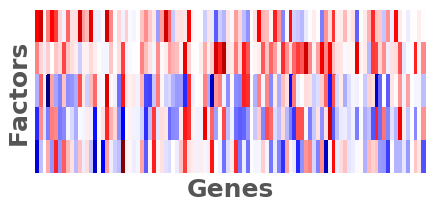

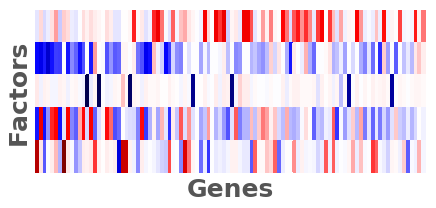

In [7]:
plt.figure(figsize=(7,3))
sns.heatmap(source_pc_df,
            cmap='seismic_r',
            center=0,
            cbar=False)
plt.ylabel('Factors', fontsize=25, fontweight='bold')
plt.xlabel('Genes', fontsize=25, fontweight='bold')
plt.yticks([], [])
plt.xticks([], [])
plt.savefig('./figures/fig1_source_factors_view.png', dpi=300)
plt.show()

plt.figure(figsize=(7,3))
sns.heatmap(target_pc_df,
            cmap='seismic_r',
            center=0,
            cbar=False)
plt.yticks([], [])
plt.xticks([], [])
plt.ylabel('Factors', fontsize=25, fontweight='bold')
plt.xlabel('Genes', fontsize=25, fontweight='bold')
plt.savefig('./figures/fig1_target_factors_view.png', dpi=300)
plt.show()

In [8]:
principal_vectors = PVComputation(
    n_factors = n_factors,
    n_pv = n_pv,
    dim_reduction = dim_reduction,
    dim_reduction_target = dim_reduction_target
)

principal_vectors.compute_principal_vectors(source_pc, target_pc)

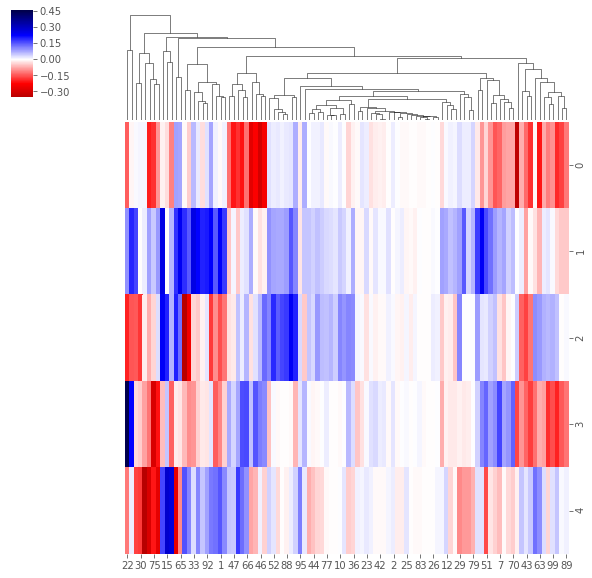

In [9]:
# Create clustermap on the columns.
g_source = sns.clustermap((principal_vectors.source_components_), row_cluster=False, cmap='seismic_r', center=0)

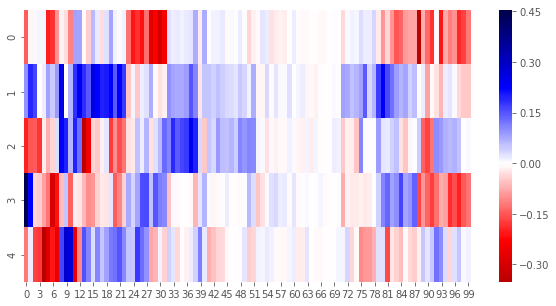

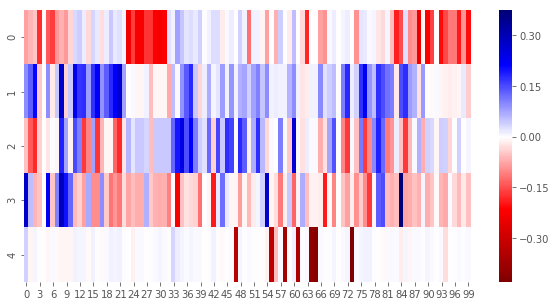

In [10]:
plt.figure(figsize=(10,5))
sns.heatmap(principal_vectors.source_components_[:,g_source.dendrogram_col.reordered_ind],
            cmap='seismic_r',
            center=0)
plt.show()

plt.figure(figsize=(10,5))
sns.heatmap(principal_vectors.target_components_[:,g_source.dendrogram_col.reordered_ind],
            cmap='seismic_r',
            center=0)
plt.show()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: FutureWarning: sortlevel is deprecated, use sort_index(level= ...)
  # Remove the CWD from sys.path while we load stuff.


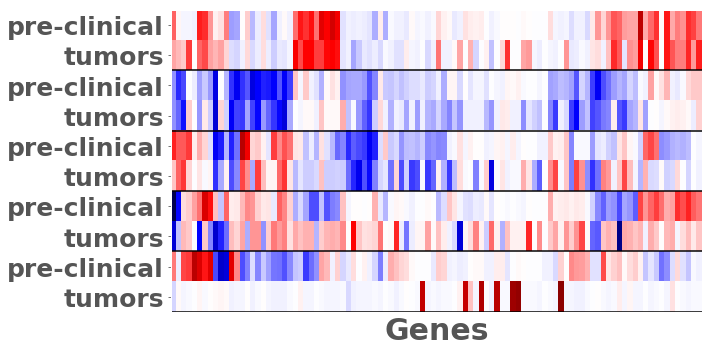

In [11]:
# Vizualisation of principal vectors
plt.figure(figsize=(10,5))
pv_df = pd.DataFrame(np.concatenate([
    principal_vectors.source_components_,
    principal_vectors.target_components_]),
                    columns=range(X_source_filtered.shape[1]))

pv_df['PV'] = ['PV %s'%(i+1) for i in range(n_pv)]*2
pv_df['system'] = np.concatenate([['source']*n_pv, ['target']*n_pv])
pv_df = pv_df.set_index(['PV', 'system']).sortlevel(axis=0)

ax = sns.heatmap(pv_df[g_source.dendrogram_col.reordered_ind],
            cmap='seismic_r',
            center=0,
            cbar=False)

for i in range(n_pv+1):
    ax.axhline(2*i, color='black')
plt.xlabel('Genes', fontsize=30, fontweight='bold')
plt.yticks(plt.yticks()[0], ['pre-clinical', 'tumors']*n_pv, fontsize=25, fontweight='bold')
plt.xticks([],[])
plt.ylabel('')

ax2 = ax.twinx()
ax2.set_yticks(np.arange(n_pv,2)+1)
ax2.set_yticklabels(['PV %s'%(i) for i in range(n_pv)])

plt.tight_layout()
plt.savefig('./figures/fig1_pv_view.png', dpi=300)
plt.show()

## Consensus

In [14]:
consensus = ConsensusRepresentation(source_data=X_source,
                                   target_data=X_target,
                                   n_factors=n_factors,
                                   n_pv=n_pv,
                                   dim_reduction='sparsepca',
                                   n_representations=100,
                                   use_data=False,
                                   mean_center=mean_center,
                                   std_unit=std_unit)

consensus.fit(X_source)

consensus_representation = consensus.consensus_representation

/anaconda3/lib/python3.7/site-packages/sklearn/decomposition/sparse_pca.py:170: DeprecationWarning: normalize_components=False is a backward-compatible setting that implements a non-standard definition of sparse PCA. This compatibility mode will be removed in 0.22.
  DeprecationWarning)


Iteration   0 (elapsed time:   0s,  0.0mn, current cost     nan)
Iteration   1 (elapsed time:  11s,  0.2mn, current cost  567981.201)
Adding new random atom
Iteration   2 (elapsed time:  12s,  0.2mn, current cost  563528.385)
Adding new random atom
Iteration   3 (elapsed time:  13s,  0.2mn, current cost  563359.797)
Adding new random atom
Iteration   4 (elapsed time:  14s,  0.2mn, current cost  563275.427)
Adding new random atom
Iteration   5 (elapsed time:  15s,  0.3mn, current cost  563213.061)
Adding new random atom
Iteration   6 (elapsed time:  16s,  0.3mn, current cost  563152.535)
Adding new random atom
--- Convergence reached after 6 iterations


/anaconda3/lib/python3.7/site-packages/sklearn/decomposition/sparse_pca.py:170: DeprecationWarning: normalize_components=False is a backward-compatible setting that implements a non-standard definition of sparse PCA. This compatibility mode will be removed in 0.22.
  DeprecationWarning)


Iteration   0 (elapsed time:   3s,  0.1mn, current cost     nan)
Iteration   1 (elapsed time:  17s,  0.3mn, current cost  8474913.033)
Iteration   2 (elapsed time:  20s,  0.3mn, current cost  7881829.834)
Iteration   3 (elapsed time:  23s,  0.4mn, current cost  7850355.544)
Iteration   4 (elapsed time:  26s,  0.4mn, current cost  7825674.275)
Iteration   5 (elapsed time:  29s,  0.5mn, current cost  7809306.426)
Iteration   6 (elapsed time:  32s,  0.5mn, current cost  7794234.445)
Iteration   7 (elapsed time:  35s,  0.6mn, current cost  7778461.574)
Iteration   8 (elapsed time:  38s,  0.6mn, current cost  7762944.971)
Iteration   9 (elapsed time:  41s,  0.7mn, current cost  7750823.087)
Iteration  10 (elapsed time:  44s,  0.7mn, current cost  7744032.630)
Iteration  11 (elapsed time:  46s,  0.8mn, current cost  7741151.287)
Iteration  12 (elapsed time:  49s,  0.8mn, current cost  7740008.838)
--- Convergence reached after 12 iterations


IndexError: index 4 is out of bounds for axis 0 with size 4

In [ ]:
plt.figure(figsize=(10,4))
sns.heatmap(consensus_representation.transpose()[:3,g_source.dendrogram_col.reordered_ind],
            cmap='seismic_r',
            center=0,
            cbar=False)
plt.xticks([], [])
plt.yticks([], [])
plt.xlabel('Genes', fontsize=35, fontweight='bold')
plt.ylabel('Common \n factors', fontsize=35, fontweight='bold')

plt.tight_layout()
plt.savefig('./figures/fig1_consensus_view.png', dpi=300)
plt.show()